In [1]:
#correlation between different variables - both categorical and numerical

Data Prep

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import seaborn as sns
import pickle

%matplotlib inline

In [3]:
df = pd.read_csv("mtp_dataset_3_mod.csv")
df

,order,lithology,life_mode,motility,feeding_mode,shell_mineralogy,species_richness,ornamentation,environmental_breadth,geographic_range,occurrence,body_size,survival_status
0,Arcida,mixed,epifaunal,stationary,suspension feeder,aragonite,1,2,2,1,2,21.252741,Survived
1,Pectinida,siliciclastic,epifaunal,mobile,suspension feeder,aragonite,1,2,4,4,10,140.973189,Survived
2,Nuculida,siliciclastic,infaunal,mobile,deposit feeder,aragonite,1,2,1,1,1,34.467376,Survived
3,Nuculida,siliciclastic,infaunal,mobile,deposit feeder,aragonite,4,2,5,4,33,2.959831,Survived
4,Ostreida,mixed,epifaunal,stationary,suspension feeder,low Mg calcite,3,2,2,6,62,79.602764,Survived
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Mytilida,siliciclastic,epifaunal,stationary,suspension feeder,aragonite,1,2,1,1,5,22.024430,Extinct
304,Pholadida,siliciclastic,boring,stationary,suspension feeder,aragonite,1,2,1,1,1,19.559939,Survived
305,Trigoniida,siliciclastic,infaunal,mobile,suspension feeder,aragonite,3,2,3,2,6,70.896303,Extinct
306,Nuculanida,siliciclastic,infaunal,mobile,deposit feeder,aragonite,5,1,4,2,15,30.932184,Survived


In [4]:
df = pd.read_csv('mtp_dataset_3_mod.csv')
boring = df[df['life_mode'] == 'boring'].index
df['body_size'] = np.log(df['body_size']) #log transforming body size
df = df.assign(survival_status=df.survival_status.eq('Extinct').astype(int)) #encoding "extinct" as 1 and "survived" as 0
df.drop(['order'], axis = 1, inplace = True) #dropping the column "order"
df.replace('boring', 'infaunal', inplace = True)
df

,lithology,life_mode,motility,feeding_mode,shell_mineralogy,species_richness,ornamentation,environmental_breadth,geographic_range,occurrence,body_size,survival_status
0,mixed,epifaunal,stationary,suspension feeder,aragonite,1,2,2,1,2,3.056486,0
1,siliciclastic,epifaunal,mobile,suspension feeder,aragonite,1,2,4,4,10,4.948570,0
2,siliciclastic,infaunal,mobile,deposit feeder,aragonite,1,2,1,1,1,3.540013,0
3,siliciclastic,infaunal,mobile,deposit feeder,aragonite,4,2,5,4,33,1.085132,0
4,mixed,epifaunal,stationary,suspension feeder,low Mg calcite,3,2,2,6,62,4.377049,0
...,...,...,...,...,...,...,...,...,...,...,...,...
303,siliciclastic,epifaunal,stationary,suspension feeder,aragonite,1,2,1,1,5,3.092152,1
304,siliciclastic,infaunal,stationary,suspension feeder,aragonite,1,2,1,1,1,2.973484,0
305,siliciclastic,infaunal,mobile,suspension feeder,aragonite,3,2,3,2,6,4.261218,1
306,siliciclastic,infaunal,mobile,deposit feeder,aragonite,5,1,4,2,15,3.431797,0


### Correlation between numerical variables - Pearson correlation

                       species_richness  ornamentation  environmental_breadth  \
species_richness               1.000000       0.173499               0.667472   
ornamentation                  0.173499       1.000000               0.144224   
environmental_breadth          0.667472       0.144224               1.000000   
geographic_range               0.704963       0.178871               0.810861   
occurrence                     0.654564       0.157580               0.608473   
body_size                      0.032753       0.083046               0.110174   

                       geographic_range  occurrence  body_size  
species_richness               0.704963    0.654564   0.032753  
ornamentation                  0.178871    0.157580   0.083046  
environmental_breadth          0.810861    0.608473   0.110174  
geographic_range               1.000000    0.637200   0.157829  
occurrence                     0.637200    1.000000  -0.015337  
body_size                      0.157829   

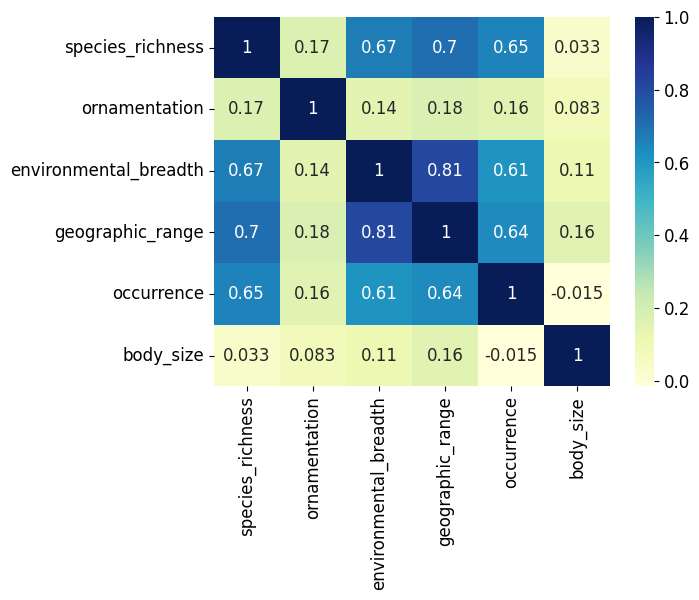

In [5]:
df1 = df.drop(['survival_status'], axis = 1)

print(df1.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)

### Correlation among categorical variables - Chi-Square
<br>
Doubt - Do I have to encode them??

In [6]:
import os as os
from itertools import product
import scipy.stats as ss

In [7]:
df_cat = pd.DataFrame(data = df.dtypes, columns = 
                                         ['a']).reset_index()
cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])
cat_var

['lithology', 'life_mode', 'motility', 'feeding_mode', 'shell_mineralogy']

In [8]:
df_cat = df[cat_var]
df_cat.head()

,lithology,life_mode,motility,feeding_mode,shell_mineralogy
0,mixed,epifaunal,stationary,suspension feeder,aragonite
1,siliciclastic,epifaunal,mobile,suspension feeder,aragonite
2,siliciclastic,infaunal,mobile,deposit feeder,aragonite
3,siliciclastic,infaunal,mobile,deposit feeder,aragonite
4,mixed,epifaunal,stationary,suspension feeder,low Mg calcite


In [9]:
## Let us split this list into two parts
cat_var1 = ('lithology', 'life_mode', 'motility', 'feeding_mode', 'shell_mineralogy')
cat_var2 = ('lithology', 'life_mode', 'motility', 'feeding_mode', 'shell_mineralogy')

## Let us jump to Chi-Square test
## Creating all possible combinations between the above two variables list
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))


In [10]:
## Creating an empty variable and picking only the p value from the output of Chi-Square test
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df_cat[i[0]], df_cat[i[1]])))[1]))
result


[('lithology', 'life_mode', 0.12729911701762187),
 ('lithology', 'motility', 0.07195169351899738),
 ('lithology', 'feeding_mode', 0.41024688740266974),
 ('lithology', 'shell_mineralogy', 0.016391482525778784),
 ('life_mode', 'lithology', 0.12729911701762184),
 ('life_mode', 'motility', 5.243786015050745e-21),
 ('life_mode', 'feeding_mode', 9.655769884937316e-05),
 ('life_mode', 'shell_mineralogy', 3.0312582211459453e-23),
 ('motility', 'lithology', 0.07195169351899734),
 ('motility', 'life_mode', 5.2437860150507815e-21),
 ('motility', 'feeding_mode', 1.6460495875577953e-06),
 ('motility', 'shell_mineralogy', 6.585556399902672e-11),
 ('feeding_mode', 'lithology', 0.41024688740267007),
 ('feeding_mode', 'life_mode', 9.655769884937316e-05),
 ('feeding_mode', 'motility', 1.6460495875577892e-06),
 ('feeding_mode', 'shell_mineralogy', 0.03982644738725455),
 ('shell_mineralogy', 'lithology', 0.01639148252577876),
 ('shell_mineralogy', 'life_mode', 3.0312582211459453e-23),
 ('shell_mineralogy'

In [12]:
## Creating an empty variable and picking only the chi2 from the output of Chi-Square test
result1 = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result1.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df_cat[i[0]], df_cat[i[1]])))[0]))
result1

[('lithology', 'life_mode', 9.937726266040993),
 ('lithology', 'motility', 6.998308888150264),
 ('lithology', 'feeding_mode', 15.58367525279656),
 ('lithology', 'shell_mineralogy', 10.27181134001943),
 ('life_mode', 'lithology', 9.937726266040995),
 ('life_mode', 'motility', 93.39448638695818),
 ('life_mode', 'feeding_mode', 35.65277950824413),
 ('life_mode', 'shell_mineralogy', 103.7009587020649),
 ('motility', 'lithology', 6.998308888150265),
 ('motility', 'life_mode', 93.39448638695816),
 ('motility', 'feeding_mode', 34.80449393129641),
 ('motility', 'shell_mineralogy', 42.63834772141371),
 ('feeding_mode', 'lithology', 15.583675252796558),
 ('feeding_mode', 'life_mode', 35.65277950824413),
 ('feeding_mode', 'motility', 34.80449393129642),
 ('feeding_mode', 'shell_mineralogy', 11.65544662309368),
 ('shell_mineralogy', 'lithology', 10.271811340019433),
 ('shell_mineralogy', 'life_mode', 103.7009587020649),
 ('shell_mineralogy', 'motility', 42.63834772141371),
 ('shell_mineralogy', 'f

In [11]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 
                                                       'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

var2,feeding_mode,life_mode,lithology,motility,shell_mineralogy
var1,,,,,
feeding_mode,NaN,9.655770e-05,0.410247,1.646050e-06,3.982645e-02
life_mode,0.000097,NaN,0.127299,5.243786e-21,3.031258e-23
lithology,0.410247,1.272991e-01,NaN,7.195169e-02,1.639148e-02
motility,0.000002,5.243786e-21,0.071952,NaN,6.585556e-11
shell_mineralogy,0.039826,3.031258e-23,0.016391,6.585556e-11,NaN


In [13]:
chi_test_output = pd.DataFrame(result1, columns = ['var1', 'var2', 
                                                       'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

var2,feeding_mode,life_mode,lithology,motility,shell_mineralogy
var1,,,,,
feeding_mode,NaN,35.652780,15.583675,34.804494,11.655447
life_mode,35.652780,NaN,9.937726,93.394486,103.700959
lithology,15.583675,9.937726,NaN,6.998309,10.271811
motility,34.804494,93.394486,6.998309,NaN,42.638348
shell_mineralogy,11.655447,103.700959,10.271811,42.638348,NaN


There exists a relationship between two variables if p value ≤ 0.05. So from the above table we can say that there is definitely some association between Dependents and Gender, Dependents and Married, Married and Gender. For rest of the pairs there exists no relationship

https://medium.com/@ritesh.110587/correlation-between-categorical-variables-63f6bd9bf2f7#:~:text=Chi%2DSquare%20test%20of%20independence,categorical%20variables%20is%20easily%20available.

### Correlation between numerical and categorical variables - ANOVA

http://www.sefidian.com/2022/08/02/measure-the-correlation-between-numerical-and-categorical-variables-and-the-correlation-between-two-categorical-variables-in-python-chi-square-and-anova/

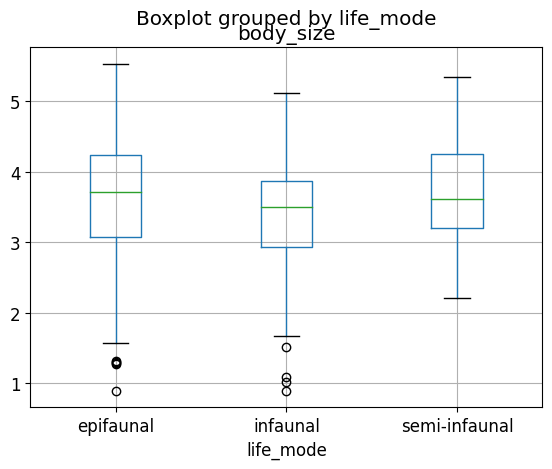

In [12]:
_ = df.boxplot('body_size', by='life_mode')

<AxesSubplot:xlabel='life_mode', ylabel='survival_status'>

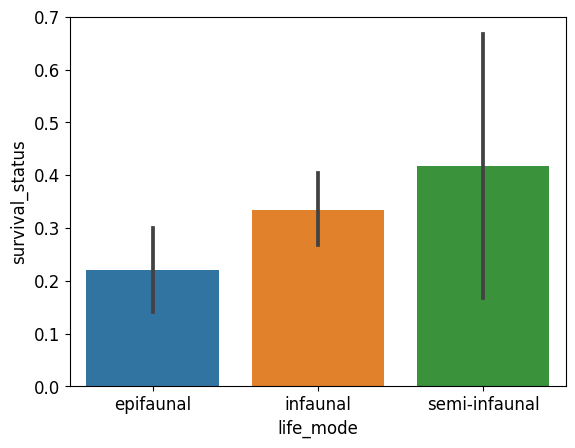

In [13]:
sns.barplot(data=df, x="life_mode", y="survival_status")

### encoding and stuff

In [14]:
from sklearn.preprocessing import MinMaxScaler #normalises the data

num_cols = ['species_richness', 'ornamentation', 'environmental_breadth', 'geographic_range', 'occurrence', 'body_size']
cat_cols = ['lithology', 'life_mode', 'motility', 'feeding_mode', 'shell_mineralogy']

# apply one-hot encoding on categorical features
df = pd.get_dummies(df, columns = cat_cols)

# apply normalisation on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = MinMaxScaler().fit(df[[i]])
    
    # transform the training data column
    df[i] = scale.transform(df[[i]])

In [15]:
df.to_csv('modified_dataset.csv')

In [16]:
X = df.drop("survival_status", axis=1)
y = df.survival_status

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

In [18]:
for col in df.columns:
    print(col)

species_richness
ornamentation
environmental_breadth
geographic_range
occurrence
body_size
survival_status
lithology_carbonate
lithology_mixed
lithology_others
lithology_siliciclastic
life_mode_epifaunal
life_mode_infaunal
life_mode_semi-infaunal
motility_mobile
motility_stationary
feeding_mode_carnivore
feeding_mode_chemosymbiotic
feeding_mode_deposit feeder
feeding_mode_herbivore
feeding_mode_photosymbiotic
feeding_mode_suspension feeder
shell_mineralogy_aragonite
shell_mineralogy_low Mg calcite


### Functions

In [19]:
#function to create and print the confusion matrix and the precision recall and F1 scores
from sklearn.metrics import confusion_matrix
def plot_cm(classifier, predictions):
    cm = confusion_matrix(y_test, predictions)
    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    classNames = ['Extinct','Survived']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    
    plt.show()
        
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp+tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    F1 = 2*recall*precision/(recall+precision)

    print('Accuracy={0:0.3f}'.format(accuracy))
    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))

In [20]:
#function to create the precision- recall curve
from sklearn.metrics import average_precision_score, precision_recall_curve
def plot_aucprc(classifier, scores):
    precision, recall, _ = precision_recall_curve(y_test, scores, pos_label=0)
    average_precision = average_precision_score(y_test, scores)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()

In [21]:
#function to create the ROC cureve
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
def plot_aucroc(classifier):
    probs = classifier.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### XGBoost

In [22]:
# train_x = X_train.values
# test_x = X_test.values

In [23]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

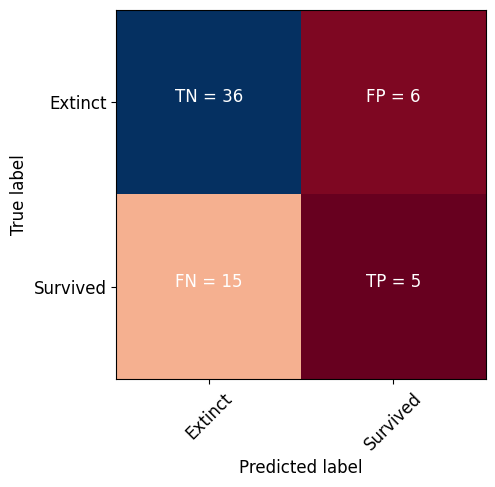

Accuracy=0.661
Recall=0.250 
Precision=0.455
F1=0.323
Average precision-recall score: 0.423


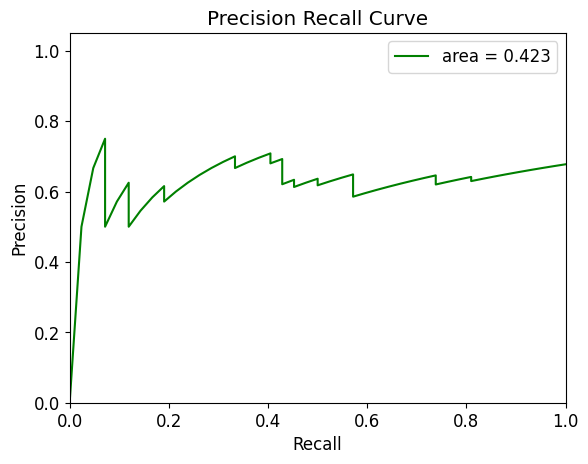

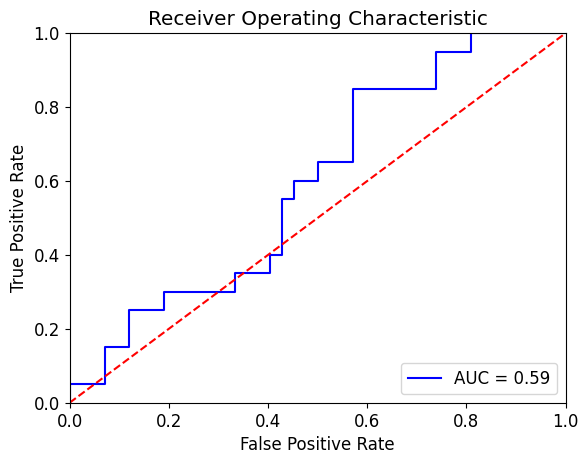

In [24]:
#Make predictions
y_pred = xgb_cl.predict(X_test)
try:
    scores = xgb_cl.decision_function(X_test)
except:
    scores = xgb_cl.predict_proba(X_test)[:,1]
#Make plots
y_pred = xgb_cl.predict(X_test)
plot_cm(xgb_cl, y_pred)
plot_aucprc(xgb_cl, scores)
plot_aucroc(xgb_cl)

### XGBoost with SMOTE 

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 27)

Classification of SMOTE-resampled dataset with XGboost


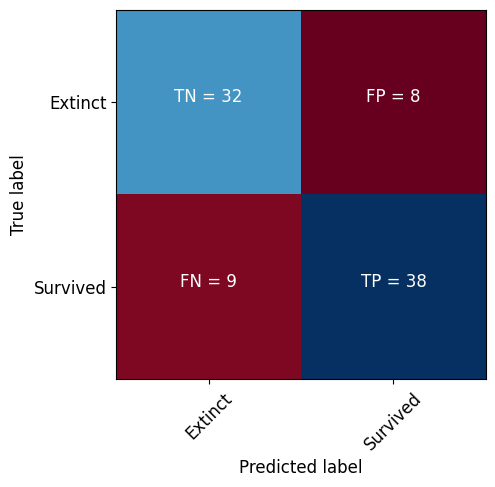

Accuracy=0.805
Recall=0.809 
Precision=0.826
F1=0.817
Average precision-recall score: 0.895


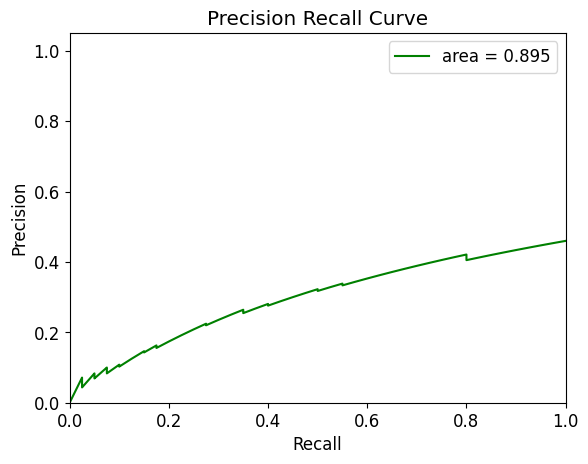

KeyboardInterrupt: 

In [26]:
xgb_cl.fit(X_train, y_train)
print('Classification of SMOTE-resampled dataset with XGboost')
y_pred = xgb_cl.predict(X_test)
try:
    scores = xgb_cl.decision_function(X_test)
except:
    scores = xgb_cl.predict_proba(X_test)[:,1]
#Make plots
y_pred = xgb_cl.predict(X_test)
plot_cm(xgb_cl, y_pred)
plot_aucprc(xgb_cl, scores)
plot_aucroc(xgb_cl)

### SHAP

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


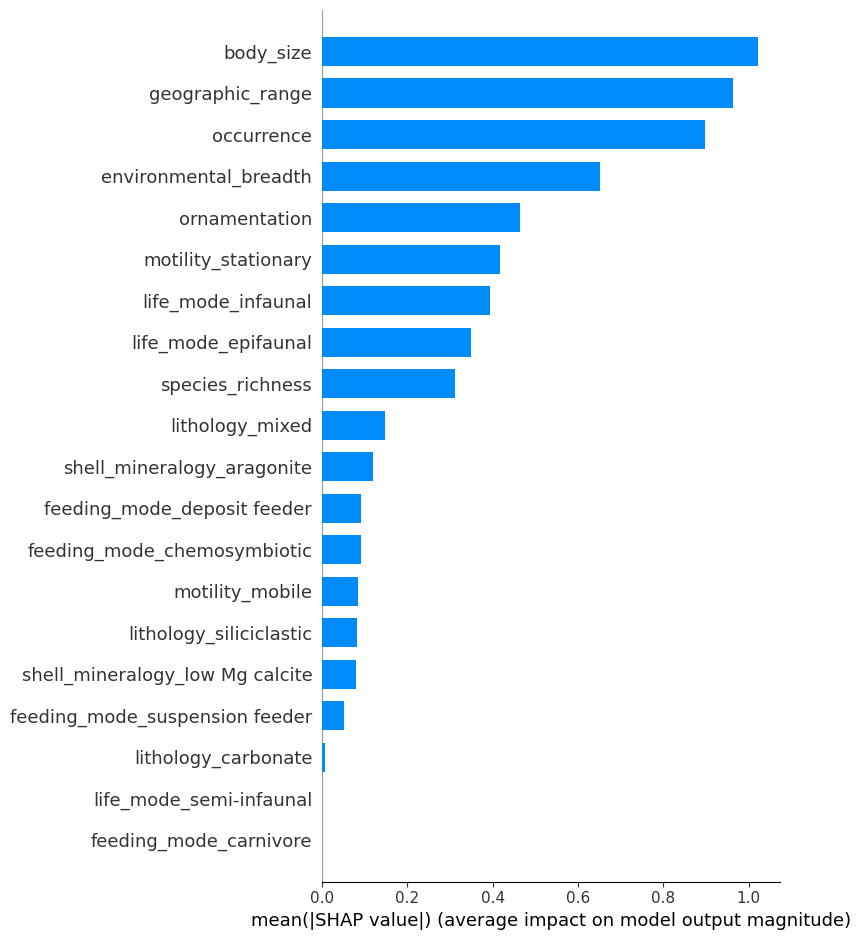

In [ ]:
import shap
explainer = shap.TreeExplainer(xgb_cl)
shap_values = explainer.shap_values(X_train)

features = df.drop(['survival_status'], axis=1).columns.tolist() #not needed for this plot
shap_df = pd.DataFrame(shap_values, columns=pd.Index(features, name='features')) #not needed for this plot

shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
shap_values

array([[-0.04709524,  0.25041467,  0.6754554 , ...,  0.05203879,
        -0.09844518,  0.07217114],
       [-0.0860141 ,  0.02393447,  0.20953308, ...,  0.02418764,
        -0.33693013,  0.02451222],
       [-0.11029075,  0.41276103, -0.17881349, ..., -0.19392304,
        -0.05309885,  0.0169104 ],
       ...,
       [-0.01729767, -0.03998907,  1.1487337 , ...,  0.04844903,
         0.22622016,  0.07608565],
       [ 0.00796559, -0.18471782, -0.36074582, ...,  0.02479604,
         0.01109897, -0.8523643 ],
       [-0.05118647,  0.06317358,  0.27176538, ...,  0.04601296,
        -0.5606644 ,  0.03640223]], dtype=float32)

In [ ]:
group_categorical = {
    'lithology' : 	['lithology_carbonate',
                    'lithology_mixed',
                    'lithology_others',
                    'lithology_siliciclastic'],
    
    'life_mode'	:['life_mode_epifaunal',
                'life_mode_infaunal',
                'life_mode_semi-infaunal'],
    
    'motility' : ['motility_mobile',
                'motility_stationary'],
    
    'feeding_mode' : ['feeding_mode_carnivore',
                    'feeding_mode_chemosymbiotic',
                    'feeding_mode_deposit feeder',
                    'feeding_mode_photosymbiotic',
                    'feeding_mode_suspension feeder'],	
    
    'shell_mineralogy' : ['shell_mineralogy_aragonite',
                        'shell_mineralogy_low Mg calcite'],

    'species_richness' : ['species_richness'],
    
    'ornamentation'	: ['ornamentation'],
    
    'environmental_breadth' : ['environmental_breadth'],	
    
    'geographic_range' : ['geographic_range'],	
    
    'occurrence' : ['occurrence'],

    'body_size' : ['body_size']
}

In [ ]:
from itertools import repeat, chain
revert_dict = lambda d: dict(chain(*[zip(val, repeat(key)) for key, val in d.items()]))

map = revert_dict(group_categorical)

In [ ]:
def grouped_shap(shap_vals, features, groups):
    groupmap = revert_dict(groups)
    shap_Tdf = pd.DataFrame(shap_vals, columns=pd.Index(features, name='features')).T
    shap_Tdf['group'] = shap_Tdf.reset_index().features.map(groupmap).values
    shap_grouped = shap_Tdf.groupby('group').sum().T
    return shap_grouped

In [ ]:
shap_type = grouped_shap(shap_values, features, group_categorical)

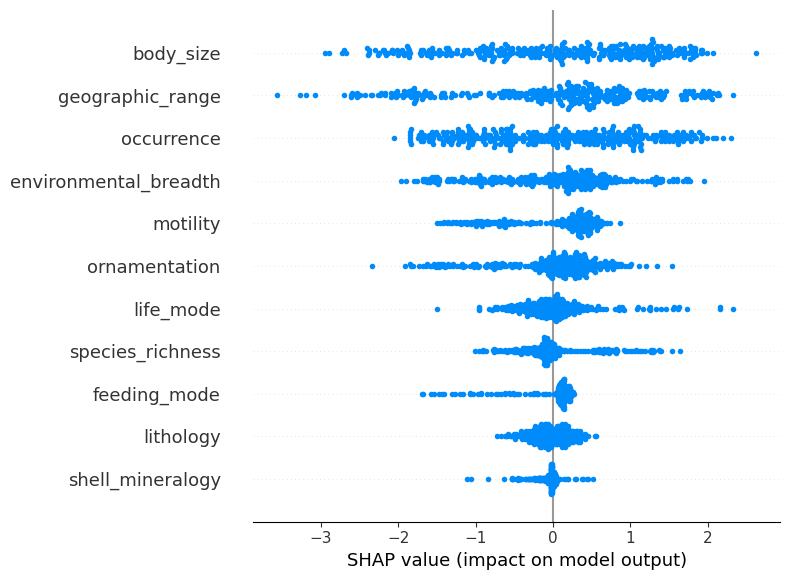

In [ ]:
shap.summary_plot(shap_type.values, features=shap_type.columns)

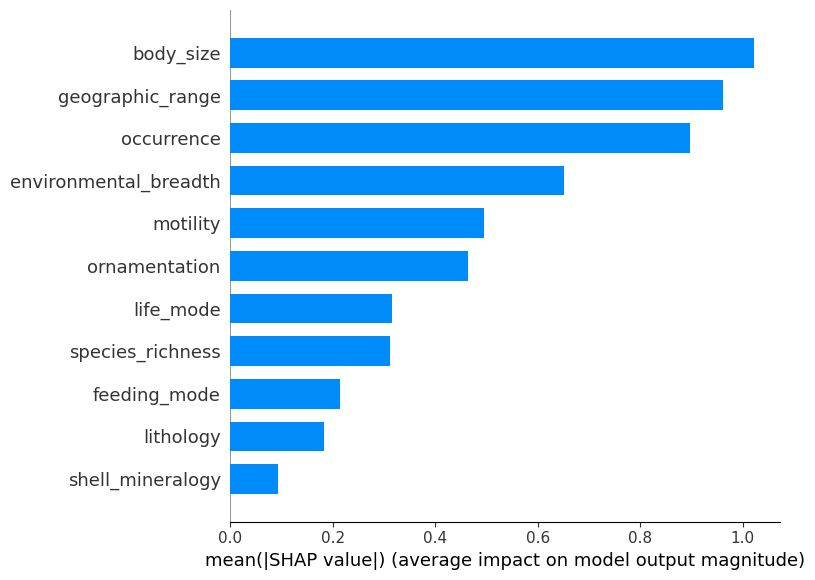

In [ ]:
shap.summary_plot(shap_type.values, features=shap_type.columns, plot_type='bar')

<AxesSubplot:xlabel='group', ylabel='group'>

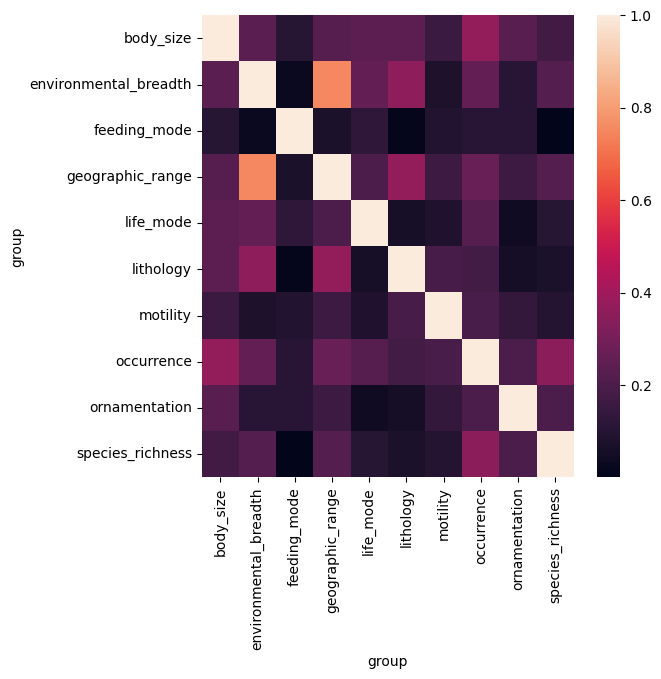

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(shap_type.corr().abs())

<Figure size 600x600 with 0 Axes>

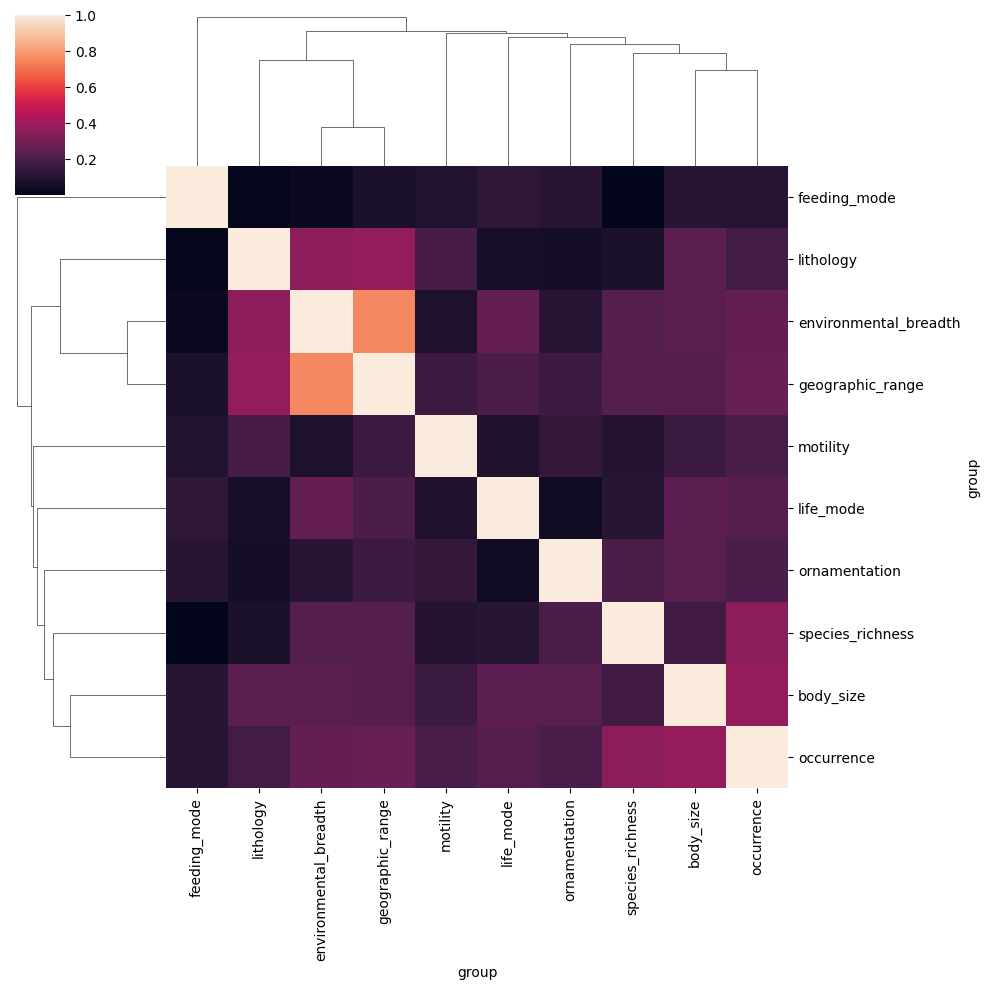

In [ ]:
plt.figure(figsize=(6,6))
sns.clustermap(shap_type.corr().abs())

### SHAP Force Plots

In [ ]:
shap.initjs()

In [ ]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])


In [ ]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0], X_train.iloc[0])
#survives


In [ ]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[1], X_train.iloc[1])
#survives

In [ ]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[2], X_train.iloc[2])

In [ ]:
X_train

,species_richness,ornamentation,environmental_breadth,geographic_range,occurrence,body_size,lithology_carbonate,lithology_mixed,lithology_others,lithology_siliciclastic,...,motility_mobile,motility_stationary,feeding_mode_carnivore,feeding_mode_chemosymbiotic,feeding_mode_deposit feeder,feeding_mode_herbivore,feeding_mode_photosymbiotic,feeding_mode_suspension feeder,shell_mineralogy_aragonite,shell_mineralogy_low Mg calcite
106,0.0,0.5,0.166667,0.000000,0.008247,0.789161,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
20,0.0,0.5,0.000000,0.000000,0.000000,0.265816,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
195,0.0,1.0,0.166667,0.071429,0.002062,0.255193,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
44,0.2,0.5,0.500000,0.142857,0.567010,0.529350,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
248,0.0,0.5,0.166667,0.000000,0.041237,0.602386,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,0.0,0.5,0.166667,0.024923,0.030446,0.609910,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
31,0.0,0.0,0.000000,0.000000,0.006186,0.419092,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
328,0.0,0.5,0.000000,0.000000,0.002112,0.421681,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
184,0.0,0.5,0.166667,0.000000,0.004124,0.465184,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
